### Importing Libraries

In [1]:
import collections
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [3]:
from plotly.offline import plot
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Loading Dataset

The data has been acquired from Kaggle open datasets. It is a raw dataset named “indian_food”, which represents entirety of the testing data for August 5th to October 5th, 2020.

Independent Variables- Actual measurement parameters of an Indian Dish which are name, ingredients, prep_time, cook_time, flavor_profile, course, state, region.

Dependent Variable- Classification of dish as part of the diet(vegetarian and non-vegetarian).

In [4]:
df = pd.read_csv('indian_food.csv')
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East

In [5]:
df.shape

(255, 9)

### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

The below diagram shows the distribution of dishes in terms of the flavor profile. There is an imbalance in the distribution as can be seen from the numbers.

Text(0.5, 1.0, 'flavor_profile countplot')

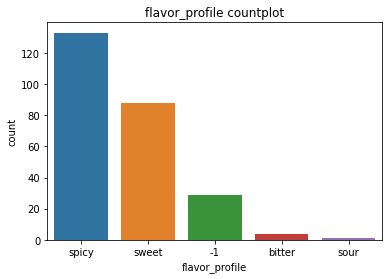

In [8]:
fig_flavorprofile = sns.countplot(data=df, x="flavor_profile", order = df['flavor_profile'].value_counts().index)
fig_flavorprofile.set_title("flavor_profile countplot")

Imbalance - The clean dataset has an imbalance of 226:29 for Vegetarian: Non-Vegetarian. This could have been handled by SMOTE technique before model building but because of the underlying architecture of SMOTE it would lead to overfitting of Non-vegetarian data points. The only solution for this is more data.

In [9]:
pie_chart = df.diet.value_counts().reset_index()
pie_chart.columns = ['diet','count']
fig = px.pie(pie_chart, values='count', names='diet', title='Vegetarian and Non-Vegetarian dishes Ratio')
fig.show()

In [10]:
ingredients = []
for i in range(len(df)):
    single_dish_ingredients =  df["ingredients"][i]
    ingredients = ingredients + [word.lower() for word in nltk.word_tokenize(single_dish_ingredients) if not word in ['.', ',']]
    
print(ingredients)

['maida', 'flour', 'yogurt', 'oil', 'sugar', 'gram', 'flour', 'ghee', 'sugar', 'carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins', 'flour', 'ghee', 'kewra', 'milk', 'clarified', 'butter', 'sugar', 'almonds', 'pistachio', 'saffron', 'green', 'cardamom', 'milk', 'powder', 'plain', 'flour', 'baking', 'powder', 'ghee', 'milk', 'sugar', 'water', 'rose', 'water', 'sugar', 'syrup', 'lentil', 'flour', 'maida', 'corn', 'flour', 'baking', 'soda', 'vinegar', 'curd', 'water', 'turmeric', 'saffron', 'cardamom', 'cashews', 'ghee', 'cardamom', 'sugar', 'milk', 'cottage', 'cheese', 'sugar', 'milk', 'rice', 'sugar', 'dried', 'fruits', 'gram', 'flour', 'ghee', 'sugar', 'yogurt', 'milk', 'nuts', 'sugar', 'refined', 'flour', 'besan', 'ghee', 'powdered', 'sugar', 'yoghurt', 'green', 'cardamom', 'firm', 'white', 'pumpkin', 'sugar', 'kitchen', 'lime', 'alum', 'powder', 'rice', 'sugar', 'nuts', 'condensed', 'milk', 'sugar', 'spices', 'nuts', 'semolina', 'ghee', 'nuts', 'milk', 'khoa', 'coconut', 'molu',

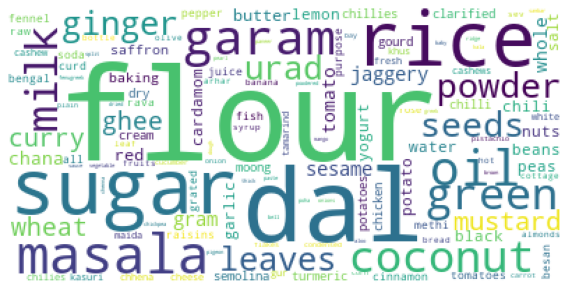

In [11]:
word_freq={}
word_freq = collections.Counter(ingredients)
W = WordCloud(background_color="white").fit_words(word_freq)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(W)
plt.axis('off')
plt.show()

#### The diagram below shows the ingredients used majorly  in the preparation of Indian dishes.

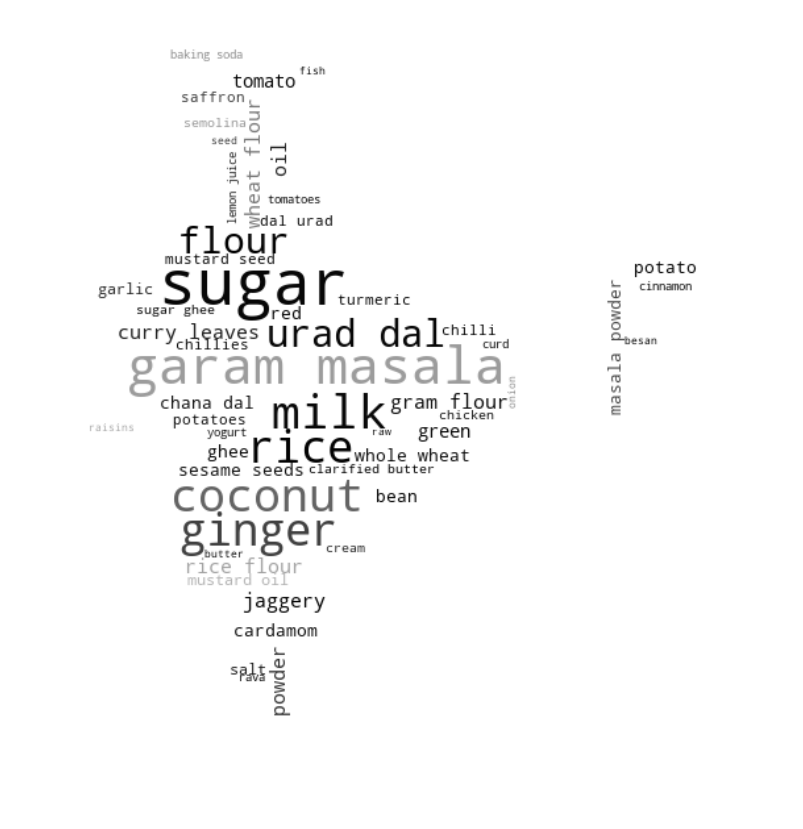

In [12]:
for i in range(0,len(ingredients)):
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('ind.jpg'))

wc = WordCloud(background_color="white", width = 400, height = 400, mask=india_coloring, min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (15, 15))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
words = np.array(list(word_freq.keys()))
print(words)

['maida' 'flour' 'yogurt' 'oil' 'sugar' 'gram' 'ghee' 'carrots' 'milk'
 'cashews' 'raisins' 'kewra' 'clarified' 'butter' 'almonds' 'pistachio'
 'saffron' 'green' 'cardamom' 'powder' 'plain' 'baking' 'water' 'rose'
 'syrup' 'lentil' 'corn' 'soda' 'vinegar' 'curd' 'turmeric' 'cottage'
 'cheese' 'rice' 'dried' 'fruits' 'nuts' 'refined' 'besan' 'powdered'
 'yoghurt' 'firm' 'white' 'pumpkin' 'kitchen' 'lime' 'alum' 'condensed'
 'spices' 'semolina' 'khoa' 'coconut' 'molu' 'leaf' 'dry' 'chhena'
 'chenna' 'cream' 'lemon' 'juice' 'flakes' 'fried' 'power' 'fennel'
 'seeds' 'jaggery' 'wheat' 'sweetened' 'reduced' 'vegetable' 'elachi'
 'and' 'peanuts' 'dharwadi' 'buffalo' 'loaf' 'bread' 'salt' 'black'
 'lentils' 'mung' 'bean' 'skimmed' 'chickpeas' 'chana' 'dal' 'apricots'
 'vermicelli' 'pudding' 'banana' 'khus-khus' 'cucumber' 'rava' 'fish'
 'potol' 'tomato' 'chillies' 'ginger' 'garlic' 'boiled' 'pork' 'onions'
 'axone' 'cauliflower' 'potato' 'garam' 'masala' 'curry' 'leaves' 'crumbs'
 'peas' 'fen

In [14]:
def create_ingredientsVector(ingredients):
    ingredients_vec = np.zeros(words.shape)
    ingredients = set([word.lower() for word in nltk.word_tokenize(ingredients) if not word in ['.', ',']])
    for ingredient in ingredients:
        idx = np.where(words == ingredient)
        ingredients_vec[idx] = 1
    return ingredients_vec.tolist()

In [15]:
df["ingredients_vec"] = df["ingredients"].map(create_ingredientsVector)
df.head()

name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region                                    ingredients_vec  
0   East  [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
1   West  [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
2  North  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...  
3   West  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...  
4   East  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...

The ingredients need to be tokenized for further analysis. This is the most important feature of the model where the diet is predicted mainly using the ingredients. The food ingredients are taken and vectors are created for each and every dish. This is similar to label encoding. This is done so that the algorithm can process the contents of the dish in the prediction process. The vectors are of the shape (255, 337) or (no of dishes, no of total ingredients).

In [16]:
ingredients_vecs = []
for i in range(len(df)):
    ingredients_vecs.append(df["ingredients_vec"][i])
    
ingredients_vecs = np.array(ingredients_vecs)

In [17]:
print(ingredients_vecs.shape)

(255, 337)


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cos_simi_matrix = cosine_similarity(ingredients_vecs, ingredients_vecs)

Text(0.5, 1.0, 'Cosine Similarity of Ingredient Vectors')

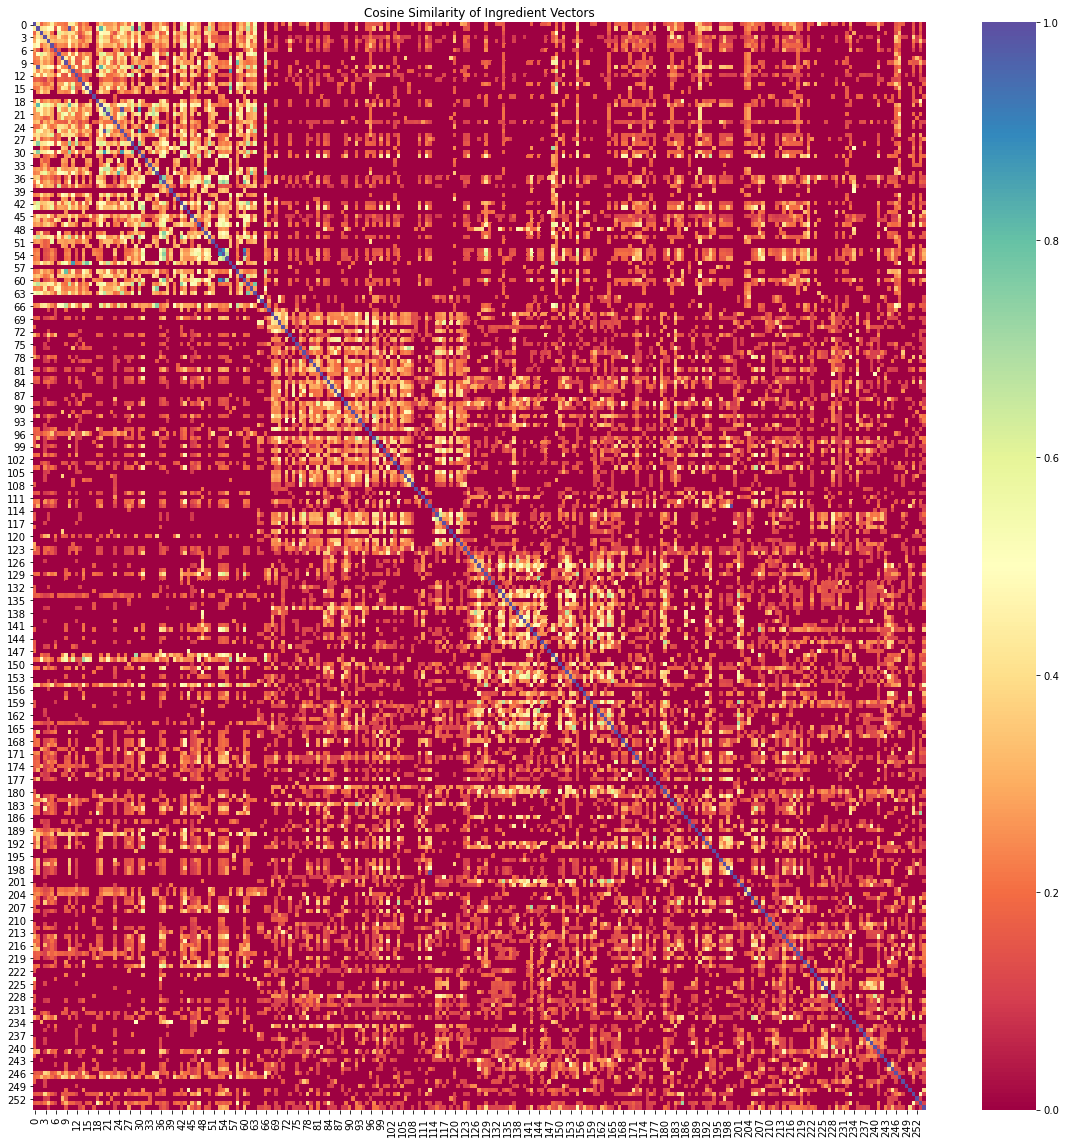

In [19]:
plt.figure(figsize=(20, 20))
fig = sns.heatmap(cos_simi_matrix, cmap="Spectral")
fig.set_title("Cosine Similarity of Ingredient Vectors")

Correlation - The correlation heatmap was used to check the correlation between the features and no highly correlated feature were indicated. All correlations are less than 0.8, indicating low correlation.

In the Heatmap 0 - 66th (these numbers correspond to index of "data frame") ingredients vectors have high cosine similarity each other. Cosine similarity to calculate similarity of ingredient vectors. If cosine similarity between two foods is high, it can be inferred that dishes are similar.

In [20]:
df[df['name'].isin(['Kheer', 'Phirni', 'Rabri'])]

name                          ingredients        diet  prep_time  \
9    Kheer      Milk, rice, sugar, dried fruits  vegetarian         10   
14  Phirni                    Rice, sugar, nuts  vegetarian         30   
15   Rabri  Condensed milk, sugar, spices, nuts  vegetarian         10   

    cook_time flavor_profile   course          state region  \
9          40          sweet  dessert             -1     -1   
14         20          sweet  dessert         Odisha   East   
15         45          sweet  dessert  Uttar Pradesh  North   

                                      ingredients_vec  
9   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...  
14  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...  
15  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...

Ingredient vectors are used to check the cosine similarity between 2 dishes. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two vectors are far apart by the Euclidean distance, chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [21]:
cosine_similarity([ingredients_vecs[9]], [ingredients_vecs[14]])

array([[0.51639778]])

In [22]:
cosine_similarity([ingredients_vecs[14]], [ingredients_vecs[15]])

array([[0.51639778]])

As seen above the dishes at location 9, 14, and 15 are sweet dishes and have very similar ingredients. Therefore the cosine similarity between the ingredient vectors is high, indicating actual closeness between the dishes.

In [23]:
df.iloc[30]['name']

'Pantua'

In [24]:
cosine_similarity([ingredients_vecs[9]], [ingredients_vecs[30]])

array([[0.2236068]])

As seen above the dich at location 30 is a savory dish compared to a sweet dish. Therefore having a small cosine similarity between them, Indicating no actual closeness between the contents of the dishes.

In [25]:
food_vocab = set()

for ingredients in df['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [26]:
print(food_vocab)

{'sooji', 'green', 'carrot', 'makki atta', 'split urad dal', 'mustard oil', 'tomato sauce', 'cabbage', 'filling', 'dough', 'lamb', 'green chillies', 'pearl millet flour', 'lobster', 'fenugreek seeds', 'bhatura', 'kala jeera', 'aloo', 'corn flour', 'curry leaves', 'brown rice flour', 'chicken chunks', 'boiled potatoes', 'curd', 'tomatoes', 'coconut flakes', 'carrots', 'banana flower', 'red onion', 'capsicum', 'jaggery syrup', 'bread crumbs', 'fish fillets', 'sweet', 'spinach', 'orange rind', 'kitchen lime', 'palak', 'mushroom', 'beetroot', 'sauce', 'masoor dal', 'whole urad dal', 'banana', 'lemon', 'eggplant', 'atta', 'tea bags', 'forbidden black rice', 'sugar syrup', 'rapeseed oil', 'mustard green', 'sesame', 'watercress', 'cardamom pods', 'lentil flour', 'green chili paste', 'cottage cheese', 'star anise', 'kala chana', 'chicken thighs', 'drumstick', 'yogurt', 'black salt', 'basmati rice', 'rose syrup', 'potato', 'spices', 'green beans', 'litre milk', 'wheat flour', 'frozen green peas

In [27]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(df['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [28]:
food_columns

maida flour  yogurt  oil  sugar  gram flour  ghee  carrots  milk  \
0            1.0     1.0  1.0    1.0         0.0   0.0      0.0   0.0   
1            0.0     0.0  0.0    1.0         1.0   1.0      0.0   0.0   
2            0.0     0.0  0.0    1.0         0.0   1.0      1.0   1.0   
3            0.0     0.0  0.0    1.0         0.0   1.0      0.0   1.0   
4            0.0     0.0  0.0    1.0         0.0   1.0      0.0   1.0   
..           ...     ...  ...    ...         ...   ...      ...   ...   
250          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
251          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
252          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
253          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
254          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   

     cashews  raisins  ...  soaked rice  cardamom pods  red pepper  \
0        0.0      0.0  ...          0.0            0.0         0.0   
1        0.0      0.0  ...          0.0            0.0         0.0   
2        1.0      1.0  ...          0.0            0.0         0.0   
3        0.0      0.0  ...          0.0            0.0         0.0   
4        0.0      0.0  ...          0.0            0.0         0.0   
..       ...      ...  ...          ...            ...         ...   
250      0.0      0.0  ...          0.0            0.0         0.0   
251      0.0      0.0  ...          0.0            0.0         0.0   
252      0.0      0.0  ...          0.0            0.0         0.0   
253      0.0      0.0  ...          0.0            0.0         0.0   
254      0.0      0.0  ...          0.0            0.0         0.0   

     watercress  glutinous rice  egg yolks  dry dates  dried rose petals  \
0           0.0             0.0        0.0        0.0                0.0   
1           0.0             0.0        0.0        0.0                0.0   
2           0.0             0.0        0.0        0.0                0.0   
3           0.0             0.0        0.0        0.0                0.0   
4           0.0             0.0        0.0        0.0                0.0   
..          ...             ...        ...        ...                ...   
250         0.0             1.0        0.0        0.0                0.0   
251         0.0             0.0        1.0        0.0                0.0   
252         0.0             0.0        0.0        1.0                1.0   
253         0.0             0.0        0.0        0.0                0.0   
254         0.0             0.0        0.0        0.0                0.0   

     arrowroot powder  ginger powder  
0                 0.0            0.0  
1                 0.0            0.0  
2                 0.0            0.0  
3                 0.0            0.0  
4                 0.0            0.0  
..                ...            ...  
250               0.0            0.0  
251               0.0            0.0  
252               0.0            0.0  
253               1.0            0.0  
254               0.0            1.0  

[255 rows x 365 columns]

In [29]:
data = pd.read_csv('indian_food.csv')
data = data.drop(['name', 'ingredients'], axis=1)

In [30]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'diet': ['vegetarian', 'non vegetarian'],
 'flavor_profile': ['sweet', 'spicy', 'bitter', '-1', 'sour'],
 'course': ['dessert', 'main course', 'starter', 'snack'],
 'state': ['West Bengal',
  'Rajasthan',
  'Punjab',
  'Uttar Pradesh',
  '-1',
  'Odisha',
  'Maharashtra',
  'Uttarakhand',
  'Assam',
  'Bihar',
  'Andhra Pradesh',
  'Karnataka',
  'Telangana',
  'Kerala',
  'Tamil Nadu',
  'Gujarat',
  'Tripura',
  'Manipur',
  'Nagaland',
  'NCT of Delhi',
  'Jammu & Kashmir',
  'Chhattisgarh',
  'Haryana',
  'Madhya Pradesh',
  'Goa'],
 'region': ['East',
  'West',
  'North',
  '-1',
  'North East',
  'South',
  'Central',
  nan]}

NaN Values – EDA shows there is no null values in the dataset but features region and state have a value “ -1 ” which is replaced NaN so that “-1” is not treated as a separate value but an unknown value. It is not replaced with a synthetic value because it is a small dataset and even 1 value addition to a any group would create an unbalance. 

In [31]:
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

Categorical Variables Encoding – Features like flavor_profile, course, state, and region are categorical variables which needed to be one-hot encoded before model building. A new binary variable is added for each unique integer value for model to work on numerical input where for categorical variables where no such ordinal relationship exists.

In [32]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [33]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

In [34]:
data

diet  prep_time  cook_time  f_bitter  f_sour  f_spicy  f_sweet  \
0    vegetarian         45         25         0       0        0        1   
1    vegetarian         80         30         0       0        0        1   
2    vegetarian         15         60         0       0        0        1   
3    vegetarian         15         30         0       0        0        1   
4    vegetarian         15         40         0       0        0        1   
..          ...        ...        ...       ...     ...      ...      ...   
250  vegetarian          5         30         0       0        0        1   
251  vegetarian         20         60         0       0        0        1   
252  vegetarian         -1         -1         0       0        0        1   
253  vegetarian         20         45         0       0        0        1   
254  vegetarian         -1         -1         0       0        0        1   

     c_dessert  c_main course  c_snack  ...  s_Tripura  s_Uttar Pradesh  \
0            1              0        0  ...          0                0   
1            1              0        0  ...          0                0   
2            1              0        0  ...          0                0   
3            1              0        0  ...          0                0   
4            1              0        0  ...          0                0   
..         ...            ...      ...  ...        ...              ...   
250          1              0        0  ...          0                0   
251          1              0        0  ...          0                0   
252          1              0        0  ...          0                0   
253          1              0        0  ...          0                0   
254          1              0        0  ...          0                0   

     s_Uttarakhand  s_West Bengal  r_Central  r_East  r_North  r_North East  \
0                0              1          0       1        0             0   
1                0              0          0       0        0             0   
2                0              0          0       0        1             0   
3                0              0          0       0        0             0   
4                0              1          0       1        0             0   
..             ...            ...        ...     ...      ...           ...   
250              0              0          0       0        0             1   
251              0              0          0       0        0             0   
252              0              0          0       0        1             0   
253              0              0          1       0        0             0   
254              0              0          0       0        0             0   

     r_South  r_West  
0          0       0  
1          0       1  
2          0       0  
3          0       1  
4          0       0  
..       ...     ...  
250        0       0  
251        0       1  
252        0       0  
253        0       0  
254        0       1  

[255 rows x 41 columns]

In [35]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)
data['prep_time'] = data['prep_time'].fillna(data['prep_time'].mean())
data['cook_time'] = data['cook_time'].fillna(data['cook_time'].mean())

In [36]:
label_encoder = LabelEncoder()
data['diet'] = label_encoder.fit_transform(data['diet'])

Dependent Variable Labeling - The dependent variable “diet” was labelled and converted to numeric to be better used by the model Class 0 for “Non-Vegetarian”, Class 1 for “Vegetarian”.

In [37]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}